# Módulo avanzado sobre métodos de  Regresion
<hr />
#### 1) Aplicación de programación orientada a objetos

##### Para esta parte hacemos uso de la libreria "reg_method.py" la cual se encuentra en el mismo folder de este notebook: 
<img src="figuras_mv/code_reg.png" alt="Alt text that describes the graphic" title="Title text" />
##### Esta libreria contiene una version modificada del método de minimos cuadrados que hace uso de programacion orientada a objetos con python. Mediante el siguiente ejemplo ilustramos su uso y ademas comprobamos su funcionalidad respecto de la version anterior. 

In [1]:
import reg_method as rg
datos = [(1.0, 1.3), (2.0, 3.5), (3.0, 4.2), (4.0, 5.0), (5.0, 7.0),(6.0, 8.8), (7.0, 10.1), (8.0, 12.5), (9.0, 13.0)]
cfs = rg.totals(datos) # creamos el objeto que contiene todos los numeros relevantes
model = rg.mincua_linear(cfs) # el modelo se contruye con el objeto como input
r2 = rg.r2(cfs) # el R2 se calcula con el objeto como input

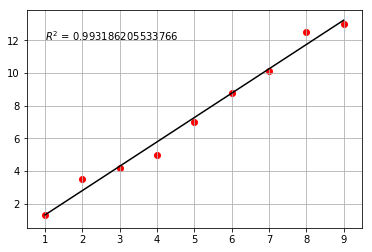

In [2]:
# graficamos el modelo resultante, note que el resultado es 
# el mismo de la version anterior.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(1,9,100)
y = model(x) # modelo lineal
plt.text(1,12,r'$R^2$ = '+str(r2))
plt.plot(x,y,'k')
for p in datos:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)

<hr />
#### 2) Analisis de datos reales
<hr />
##### En esta sección consideramos un caso de analisis de regresión usando una base de datos real de una agencia de finca raiz de Estados unidos. Los datos estan contenidos en el archivo "USA_Housing.csv". Usaremos la libreria pandas para importar los datos a una estructura dataframe en python.

##### Tenemos una agencia de finca raíz que necesita ayuda para desarrollar un modelo que le permita predecir precios de bienes inmobiliarios (casas) en Estados Unidos. Esta agencia desea un modelo para el cual esta coloque como entrada ciertos atributos del bien inmobiliario y en respuesta el modelo dé un estimado del precio al cual podría venderse dicho inmueble. La Agencia le provee una base de datos con informacion de inmuebles en diferentes regiones de los Estados unidos ("USA_Housing.csv"). 

##### La tabla de datos contiene las siguientes columnas:

* 'Avg. Area Income': Ingreso promedio de los residentes de la ciudad donde está ubicado el inmueble.
* 'Avg. Area House Age': Antigüedad promedio de las casas ubicadas en la misma ciudad del inmueble.
* 'Avg. Area Number of Rooms': Número de habitaciones promedio de las propiedades ubicadas en la misma ciudad del inmueble.
* 'Avg. Area Number of Bedrooms': Número de cuartos promedio de las propiedades ubicadas en la misma ciudad del inmueble.
* 'Area Population': Número de personas viviendo en la ciudad del inmueble.
* 'Price': Precio al cual el inmueble fue vendido.
* 'Address': Domicilio de la casa (direccion)

In [3]:
# importamos los datos con pandas
import pandas as pd
data = pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# exploramos las propiedades del dataframe:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


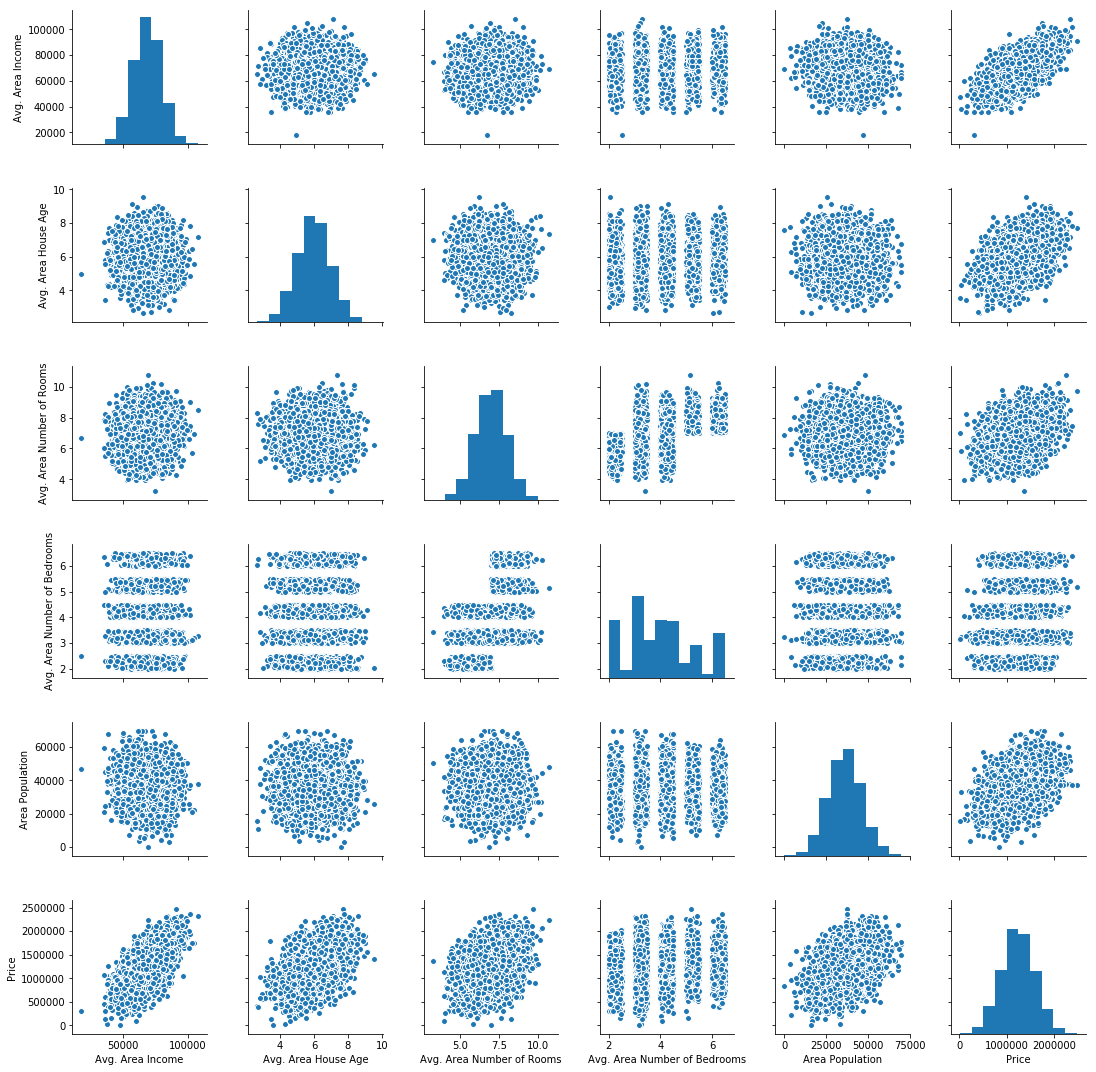

In [5]:
# hacemos un grafico global de todas las posibles correlaciones.
import seaborn as sns
sns.pairplot(data)

##### De lo anterior podemos observar ciertas correlaciones de proporcionalidad entre el precio y las demas variables de la tabla, pensemos en el precio como la variable "y" dependiente y en, por ejemplo la poblacion de la ciudad como la variable "x" independiente. ¿es razonable pensar que exista cierta relacion entre estas dos variables?

##### Por otro lado nuestro codigo de minimos cuadrados noestá diseñado para trabajar con DataFrames de pandas, en ese caso tendremos que realizar una manipulacion de la estructura de datos para adaptarla a la forma que usamos desde el principio de este modulo, para ello usamos una funcion extra contenida en "reg_method.py":

<img src="figuras_mv/ajuste2.png" alt="Alt text that describes the graphic" title="Title text" />

##### A continuacion ilustramos el uso de esta función con el dataframe que hemos creado previamente.

In [7]:
# transformamos tabla de datos al formato que 
# lee nuestro script de minimos cuadrados.
x_str ='Area Population'
y_str = 'Price'
rs_df = rg.reshape_data(x_str,y_str,data)

In [8]:
# construimos un modelo con las 
# variables escogidas
cfs = rg.totals(rs_df) # creamos el objeto que contiene todos los numeros relevantes
model = rg.mincua_linear(cfs) # el modelo se contruye con el objeto como input
r2 = rg.r2(cfs) # el R2 se calcula con el objeto como input

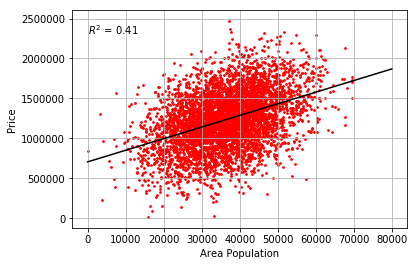

In [9]:
# graficamos el modelo con los datos
x = np.linspace(0,80000,10000)
y = model(x) # modelo lineal
plt.text(0,2300000,r'$R^2$ = '+str(round(r2,2)))
plt.plot(x,y,'k')
for p in rs_df:
    plt.scatter(p[0],p[1],c='r',s=3)
plt.xlabel(x_str)
plt.ylabel(y_str)
plt.grid(True)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


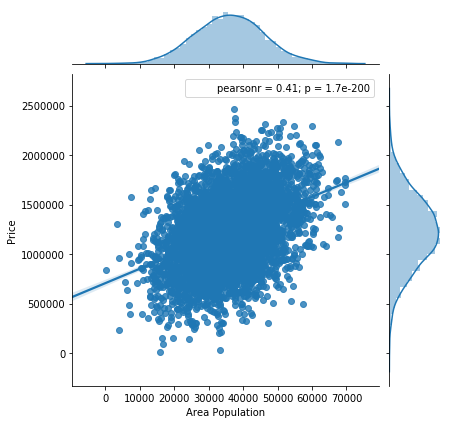

In [10]:
# con seaborn podemos obtener
# un grafico similar al anterior, 
# por ejemplo, así:
sns.jointplot(x_str,y_str,data,kind='reg')

##### con seaborn vemos que los gráficos se pueden construir en menor tiempo y por lo tanto es más eficiente. De aquí en adelante nos apoyaremos mas en seaborn para poder hacer la visualizacion de datos.

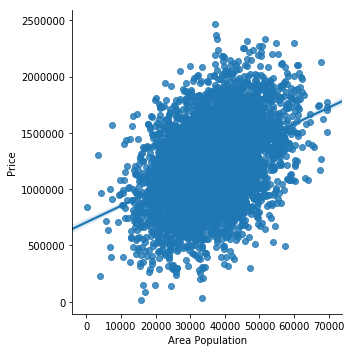

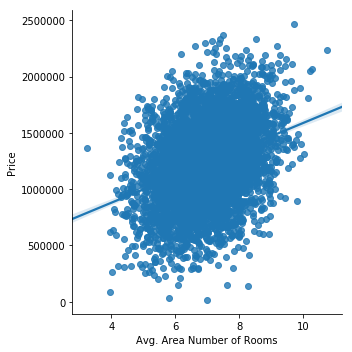

In [20]:
# Podemos realizar varias regresiones para ver simultaneamente 
# diferentes correlaciones.
sns.lmplot('Area Population','Price',data)
sns.lmplot('Avg. Area Number of Rooms','Price',data)

<hr />
# Regresion multivariable con Sckikit-Learn
<hr />